In [2]:
import tensorflow as tf

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import ReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# import matplotlib.image as image
# import os
# import pandas as pd
# import cv2
# from tqdm import tqdm
# import numpy as np
# from PIL import Image
# path = '/Users/anshdobariya/Downloads/data/spoof_color/'
# filename = '/Users/anshdobariya/Downloads/data/data2.csv'
# files = os.listdir(path)
# dim = (100, 100)
# cls = 0 #real-1
# df = pd.DataFrame(columns = [f'pix-{i}' for i in range(1, 1+(dim[0]*dim[1]))]+['class'])
# for i in tqdm(range(1, 1+len(files))):
#     img =Image.open(path+files[i])
#     df.loc[i] = list(img.getdata()) + [cls]

# df.to_csv(filename,mode='a',index = False)
# print('Task Completed')

  0%|          | 13/21844 [00:03<1:49:34,  3.32it/s]Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x1072f7580>>
Traceback (most recent call last):
  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
  0%|          | 53/21844 [00:16<1:49:07,  3.33it/s]

In [3]:
# Reading Data
df = pd.read_csv('/Users/anshdobariya/Downloads/data/data2.csv', index_col=0)


In [3]:
import os
import cv2
import numpy as np

# Define the paths to your 'real' and 'spoof' folders
real_folder = '/Users/anshdobariya/Downloads/data/live_color'
spoof_folder = '/Users/anshdobariya/Downloads/data/spoof_color'

# Initialize lists to store images and labels
X = []
y = []

# Function to load images from a folder and assign labels
def load_images_from_folder(folder, label):
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if img_path.endswith(".jpg") or img_path.endswith(".png"):
            img = cv2.imread(img_path)  # Read the image using OpenCV
            # You may need to resize or preprocess the image here
            X.append(img)
            y.append(label)

# Load images and labels from the 'real' folder
load_images_from_folder(real_folder, 1)

# Load images and labels from the 'spoof' folder
load_images_from_folder(spoof_folder, 0)

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Now, you have your images stored in X and their corresponding labels stored in y
# You can use X and y to train your machine learning model


In [4]:
X

array([[[[ 24,  56, 121],
         [ 38,  70, 135],
         [ 34,  65, 128],
         ...,
         [ 15,  33,  74],
         [ 13,  29,  75],
         [ 13,  29,  76]],

        [[ 31,  61, 126],
         [ 40,  70, 135],
         [ 29,  60, 123],
         ...,
         [ 13,  32,  70],
         [ 15,  32,  75],
         [ 16,  32,  78]],

        [[ 39,  67, 131],
         [ 39,  67, 131],
         [ 24,  52, 116],
         ...,
         [ 10,  28,  65],
         [ 17,  33,  75],
         [ 20,  36,  79]],

        ...,

        [[ 14,  13,  22],
         [  9,   9,  15],
         [  7,   7,  13],
         ...,
         [ 27,  27,  27],
         [ 35,  33,  33],
         [ 38,  36,  36]],

        [[ 14,  13,  22],
         [ 11,  11,  17],
         [ 11,  11,  17],
         ...,
         [ 19,  19,  19],
         [ 27,  25,  25],
         [ 31,  29,  29]],

        [[ 13,  12,  21],
         [ 10,  10,  16],
         [ 11,  11,  17],
         ...,
         [ 17,  17,  17],
        

In [5]:
X.dtype

dtype('uint8')

In [6]:
y.dtype

dtype('int64')

In [13]:
X = df.iloc[:, :100*100].values.reshape(-1, 100, 100, 1)
y = df.iloc[:, -1].values

In [7]:
X.shape, y.shape

((43688, 100, 100, 3), (43688,))

In [17]:
X

array([[[[175.],
         [175.],
         [175.],
         ...,
         [ 28.],
         [ 24.],
         [176.]],

        [[176.],
         [175.],
         [174.],
         ...,
         [ 29.],
         [ 25.],
         [176.]],

        [[177.],
         [176.],
         [175.],
         ...,
         [ 31.],
         [ 28.],
         [177.]],

        ...,

        [[134.],
         [132.],
         [129.],
         ...,
         [ 16.],
         [ 33.],
         [117.]],

        [[120.],
         [120.],
         [118.],
         ...,
         [ 15.],
         [ 31.],
         [ 98.]],

        [[102.],
         [105.],
         [105.],
         ...,
         [ 14.],
         [ 26.],
         [  1.]]],


       [[[ 24.],
         [ 32.],
         [ 29.],
         ...,
         [158.],
         [158.],
         [ 22.]],

        [[ 22.],
         [ 32.],
         [ 37.],
         ...,
         [158.],
         [158.],
         [ 21.]],

        [[ 31.],
         [ 34.],
      

In [6]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [35]:
X.dtype

dtype('uint8')

In [36]:
# One Hot Encoding the labels
y = to_categorical(y, num_classes= 1+ df.loc[:, 'class'].unique().shape[0])

NameError: name 'df' is not defined

In [8]:
from sklearn.model_selection import train_test_split
import numpy as np

# X = np.asarray(padding_cropped_storage)
# y = np.asarray(padding_cropped_labels)
print(X.shape)
print(y.shape)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, random_state=42)
print(f'Training dataset size of X_train: {len(X_train)}')
print(f'Testing dataset size of X_test: {len(X_test)}')
print(f'Validation dataset size of X_valid: {len(X_valid)}')
print(f'Testing dataset size of y_train: {len(y_train)}')
print(f'Testing dataset size of y_test: {len(y_test)}')
print(f'Testing dataset size of y_valid: {len(y_valid)}')

(43688, 100, 100, 3)
(43688,)
Training dataset size of X_train: 30581
Testing dataset size of X_test: 6554
Validation dataset size of X_valid: 6553
Testing dataset size of y_train: 30581
Testing dataset size of y_test: 6554
Testing dataset size of y_valid: 6553


In [10]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

model.summary()


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# X_train, X_test, y_train, y_test
history = model.fit(X_train,y_train, epochs=10, 
                    validation_data=(X_valid,y_valid))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 28224)            

KeyboardInterrupt: 

In [38]:
from datetime import datetime


In [39]:
num_classes = 2

model_name = 'Face_trained_model_'+datetime.now().strftime("%H_%M_%S_")

In [40]:
model = Sequential() # Initialising the CNN
model.add(Conv2D(32, (3, 3), input_shape = (100,100,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
# model.add(Dense(2, activation='softmax'))
model.add(Dense(2))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_12 (Dropout)        (None, 49, 49, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 23, 23, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_13 (Dropout)        (None, 23, 23, 64)       

In [41]:
X_train.shape[0]

30581

In [11]:
epochs = 10
batch_size = 255
history = model.fit(X_train, y_train,
                   epochs=epochs,
                  validation_data=(X_valid, y_valid))

Epoch 1/10
956/956 [==============================] - 79s 83ms/step - loss: 0.3529 - accuracy: 0.8511 - val_loss: 0.4105 - val_accuracy: 0.8273
Epoch 2/10
956/956 [==============================] - 82s 86ms/step - loss: 0.3170 - accuracy: 0.8713 - val_loss: 0.2881 - val_accuracy: 0.8884
Epoch 3/10
956/956 [==============================] - 88s 92ms/step - loss: 0.3845 - accuracy: 0.8572 - val_loss: 0.3343 - val_accuracy: 0.8631
Epoch 4/10
956/956 [==============================] - 86s 89ms/step - loss: 0.3119 - accuracy: 0.8749 - val_loss: 0.3251 - val_accuracy: 0.8740
Epoch 5/10
956/956 [==============================] - 88s 92ms/step - loss: 0.2829 - accuracy: 0.8852 - val_loss: 0.3413 - val_accuracy: 0.8645
Epoch 6/10
956/956 [==============================] - 86s 90ms/step - loss: 0.2511 - accuracy: 0.9008 - val_loss: 0.2816 - val_accuracy: 0.8884
Epoch 7/10
956/956 [==============================] - 87s 91ms/step - loss: 0.2536 - accuracy: 0.9023 - val_loss: 0.3023 - val_accuracy:

In [12]:
model.save("sr4.h5")

/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
loss, acc = model.evaluate(X_test, y_test)

print(f'Loss: {loss}\nAccuracy: {acc*100}')

205/205 [==============================] - 4s 20ms/step - loss: 0.2695 - accuracy: 0.8982
Loss: 0.2695278525352478
Accuracy: 89.82300758361816


In [14]:
acc

0.8982300758361816

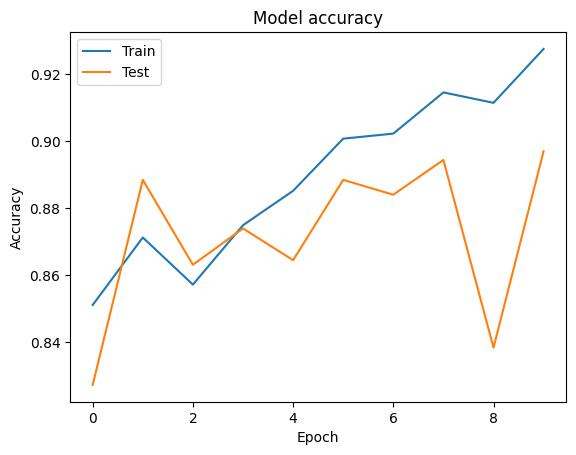

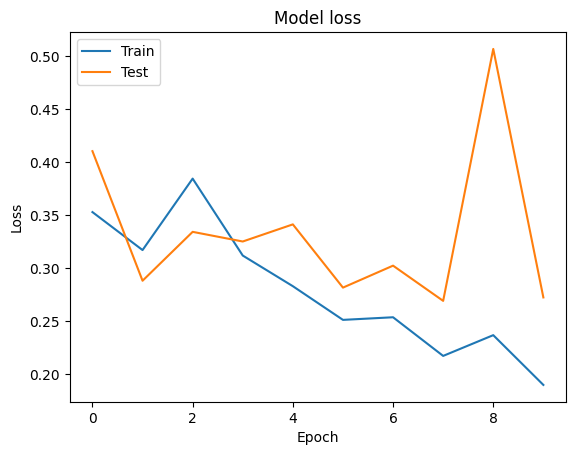

In [15]:
# Plot training & test accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & test loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [16]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=0), np.argmax(model.predict(X_test),axis=1)))

205/205 [==============================] - 4s 20ms/step


InvalidParameterError: The 'y_true' parameter of classification_report must be an array-like or a sparse matrix. Got 0 instead.

In [17]:
from sklearn.metrics import classification_report

# Assuming model.predict(X_test) returns the predicted labels
predicted_labels = model.predict(X_test)

# Assuming y_test is one-hot encoded, you may want to convert it back to categorical labels
# If y_test is not one-hot encoded, you can skip this step
import numpy as np
y_test_categorical = np.argmax(y_test, axis=1)

print(classification_report(y_test_categorical, np.argmax(predicted_labels, axis=1)))


205/205 [==============================] - 4s 20ms/step


AxisError: axis 1 is out of bounds for array of dimension 1

In [89]:
!pip3 install seaborn 

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [19]:
from sklearn.metrics import confusion_matrix,f1_score, precision_score, recall_score
import seaborn as sn
y_true = np.argmax(y_test)
y_pred = np.argmax(model.predict(X_test))
data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

205/205 [==============================] - 4s 20ms/step


InvalidParameterError: The 'y_true' parameter of confusion_matrix must be an array-like. Got 0 instead.

In [91]:
print(f1_score(y_true, y_pred, average="macro")*100)
print(precision_score(y_true, y_pred, average="macro")*100)
print(recall_score(y_true, y_pred, average="macro")*100)

89.38328048345221
89.41372383329428
89.35422104265032


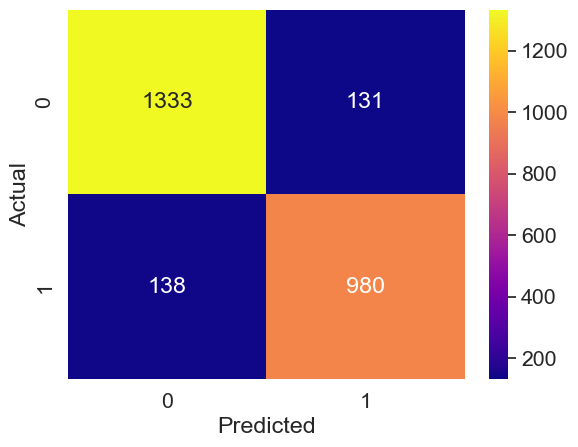

In [93]:
sn.heatmap(df_cm, annot=True, fmt="d", cmap="plasma");


In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
def AA_andEachClassAccuracy(confusion_matrix):
    from operator import truediv
    counter = confusion_matrix.shape[0]
    list_diag = np.diag(confusion_matrix)
    list_raw_sum = np.sum(confusion_matrix, axis=1)
    each_acc = np.nan_to_num(truediv(list_diag, list_raw_sum))
    average_acc = np.mean(each_acc)
    return each_acc, average_acc

def reports (nn_model, X_test,y_test):
    #start = time.time()
    Y_pred = nn_model.predict(X_test)
    y_pred = np.argmax(Y_pred, axis=1)
    #end = time.time()
    #print(end - start

    classification = classification_report(np.argmax(y_test, axis=1), y_pred, target_names=['0', '1'])
    target_names=['0', '1']
    oa = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    confusion = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
    each_acc, aa = AA_andEachClassAccuracy(confusion)
    kappa = cohen_kappa_score(np.argmax(y_test, axis=1), y_pred)
    score = nn_model.evaluate(X_test, y_test, batch_size=32)
    Test_Loss =  score[0]
    Test_accuracy = score[1]*100

    return classification, confusion, Test_Loss, Test_accuracy, oa*100, '\n'.join([' : '.join(map(str, i)) for i in zip(target_names, each_acc*100)]), aa*100, kappa*100



classification, confusion, Test_loss, Test_accuracy, oa, each_acc, aa, kappa = reports(model, X_test, y_test)
classification = str(classification)
confusion = str(confusion)
file_name = "Face_Classification_report.txt"

with open(file_name, 'w') as x_file:
    x_file.write('\nTest loss: {}%'.format(Test_loss))
    x_file.write('\n')
    x_file.write('Test accuracy: {}%'.format(Test_accuracy))
    x_file.write('\n')
    x_file.write('\n')
    x_file.write('Kappa accuracy: {}%'.format(kappa))
    x_file.write('\n')
    x_file.write('Overall accuracy: {}%'.format(oa))
    x_file.write('\n')
    x_file.write('Average accuracy: {}%'.format(aa))
    x_file.write('\n\n')
    x_file.write('Classwise Accuracy: \n{}'.format(each_acc))
    x_file.write('\n\n')
    x_file.write('Classification Report:\n{}'.format(classification))
    x_file.write('\n\n')
    x_file.write('Confusion Matrix:\n{}'.format(confusion))

81/81 [==============================] - 1s 18ms/step - loss: 0.2924 - accuracy: 0.8958


In [94]:
rand_n = np.random.randint(X_test.shape[0])
print(rand_n)

809


In [ ]:
X_test[rand_n].reshape(-1, 100, 100, 1)

array([[[[191],
         [191],
         [184],
         ...,
         [231],
         [218],
         [186]],

        [[183],
         [188],
         [185],
         ...,
         [231],
         [219],
         [183]],

        [[185],
         [182],
         [178],
         ...,
         [228],
         [218],
         [185]],

        ...,

        [[ 82],
         [ 82],
         [ 82],
         ...,
         [ 56],
         [ 57],
         [ 82]],

        [[ 82],
         [ 82],
         [ 83],
         ...,
         [ 53],
         [ 53],
         [ 81]],

        [[ 81],
         [ 82],
         [ 83],
         ...,
         [ 50],
         [ 50],
         [  2]]]])

In [22]:
X_test

array([[[[181, 178, 180],
         [182, 179, 181],
         [182, 180, 180],
         ...,
         [107, 140, 173],
         [ 99, 132, 165],
         [ 74, 109, 142]],

        [[182, 179, 181],
         [182, 179, 181],
         [181, 179, 179],
         ...,
         [109, 140, 173],
         [102, 135, 168],
         [ 75, 110, 143]],

        [[183, 180, 182],
         [182, 179, 181],
         [181, 179, 179],
         ...,
         [106, 137, 170],
         [109, 142, 175],
         [ 87, 120, 153]],

        ...,

        [[184, 186, 186],
         [185, 187, 187],
         [188, 186, 185],
         ...,
         [120, 167, 211],
         [104, 152, 194],
         [ 91, 139, 181]],

        [[185, 187, 187],
         [184, 186, 186],
         [188, 186, 185],
         ...,
         [113, 160, 204],
         [ 96, 143, 187],
         [ 91, 138, 182]],

        [[186, 188, 188],
         [184, 186, 186],
         [188, 186, 185],
         ...,
         [108, 155, 199],
        

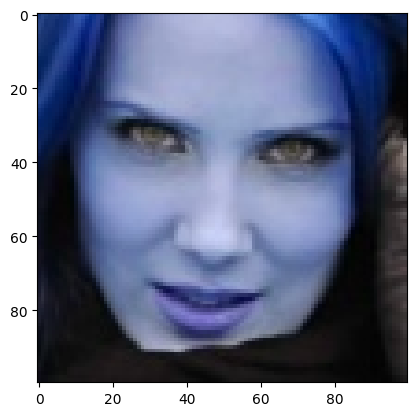

In [24]:
plt.imshow(X[0])


In [37]:
X_test[0].shape

(100, 100, 3)

2024-03-04 19:46:17.721264: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at conv_ops_fused_impl.h:761 : INVALID_ARGUMENT: convolution input must be 4-dimensional: [32,100,3]


InvalidArgumentError: Graph execution error:

Detected at node sequential_1/conv2d_3/Relu defined at (most recent call last):
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 197, in _run_module_as_main

  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 87, in _run_code

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 596, in run_forever

  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once

  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/events.py", line 80, in _run

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelbase.py", line 542, in dispatch_queue

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelbase.py", line 531, in process_one

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py", line 359, in execute_request

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelbase.py", line 775, in execute_request

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py", line 446, in do_execute

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3048, in run_cell

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3103, in _run_cell

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3308, in run_cell_async

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3490, in run_ast_nodes

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code

  File "/var/folders/r3/hrs39xfx0gzcd9gbrjpfybqc0000gn/T/ipykernel_45183/3522210472.py", line 5, in <module>

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py", line 2655, in predict

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py", line 2440, in predict_function

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py", line 2425, in step_function

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py", line 2413, in run_step

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py", line 2381, in predict_step

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py", line 590, in __call__

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/keras/src/engine/sequential.py", line 398, in call

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py", line 321, in call

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/keras/src/activations.py", line 306, in relu

  File "/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/keras/src/backend.py", line 5395, in relu

convolution input must be 4-dimensional: [32,100,3]
	 [[{{node sequential_1/conv2d_3/Relu}}]] [Op:__inference_predict_function_63296]

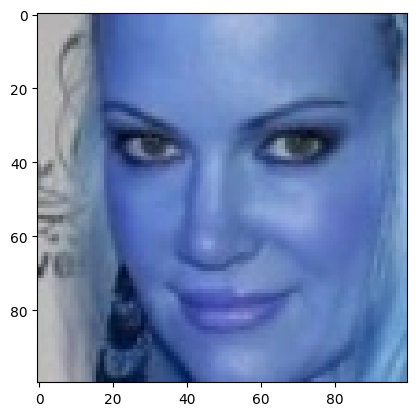

In [36]:
# Verify
i=plt.imshow(X_test[0])

# plt.title(f'Actual:{np.argmax(y_test[rand_n])} Predicted: {np.argmax(model.predict(X_test[rand_n]))}');
print(model.predict(X_test[0]))
plt.axis('off')
plt.show()

In [ ]:
X_test[rand_n].reshape(-1, 100, 100, 1).dtype

dtype('int64')

In [ ]:
import cv2

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# List of image filenames
image_filenames = ["/content/sa.jpg"]

# Main loop to process images and make predictions
for image_filename in image_filenames:
    # Read the image
    frame = cv2.imread(image_filename)

    # Check if the image is read successfully
    if frame is None:
        print(f"Error: Failed to read {image_filename}.")
        continue

    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    # Iterate through detected faces
    for (x, y, w, h) in faces:
        # Extract the face region from the frame
        face_roi = gray_frame[y:y+h, x:x+w]
        # Resize the face region to match the input requirements of your model
        resized_face = cv2.resize(face_roi, (100, 100))

        # Normalize the pixel values
        normalized_face1 = np.array(resized_face)
        normalized_face=normalized_face1.astype(np.int64)
        # Perform prediction on the preprocessed face image
        # prediction = model.predict(np.expand_dims(normalized_face, axis=0))
        desired_array = normalized_face.reshape(1, normalized_face.shape[0], normalized_face.shape[1], 1)

        # Process the prediction (you can print or use it as per your requirement)
        print(f"Prediction for {image_filename}: {model.predict(desired_array.reshape(-1, 100, 100, 1))}")


1/1 [==============================] - 0s 77ms/step
Prediction for /content/sa.jpg: [[0.00527893 0.7879969  0.09621183 0.11051237]]


array([[205, 205, 206, ..., 200, 204, 205],
       [205, 205, 205, ..., 201, 204, 204],
       [205, 205, 205, ..., 198, 202, 203],
       ...,
       [ 37,  37,  38, ...,  27,  28,  31],
       [ 36,  36,  36, ...,  27,  28,  29],
       [ 36,  36,  36, ...,  26,  28,  29]], dtype=uint8)
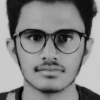

In [ ]:
        normalized_face1


In [ ]:
desired_array.reshape(-1, 100, 100, 1)

array([[[[205],
         [205],
         [206],
         ...,
         [200],
         [204],
         [205]],

        [[205],
         [205],
         [205],
         ...,
         [201],
         [204],
         [204]],

        [[205],
         [205],
         [205],
         ...,
         [198],
         [202],
         [203]],

        ...,

        [[ 37],
         [ 37],
         [ 38],
         ...,
         [ 27],
         [ 28],
         [ 31]],

        [[ 36],
         [ 36],
         [ 36],
         ...,
         [ 27],
         [ 28],
         [ 29]],

        [[ 36],
         [ 36],
         [ 36],
         ...,
         [ 26],
         [ 28],
         [ 29]]]])

array([[201, 200, 200, ..., 181, 181, 183],
       [201, 201, 201, ..., 180, 179, 182],
       [201, 201, 201, ..., 181, 181, 182],
       ...,
       [159, 157, 157, ..., 162, 162, 162],
       [159, 158, 157, ..., 163, 162, 162],
       [161, 160, 159, ..., 163, 163, 162]], dtype=uint8)
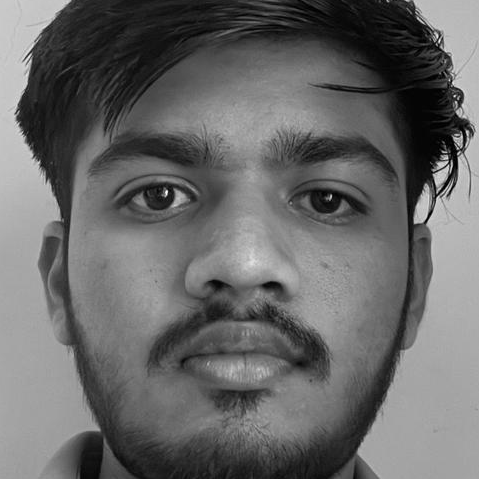

In [ ]:
face_roi

In [ ]:
normalized_face

array([[201, 202, 200, ..., 182, 184, 181],
       [201, 200, 199, ..., 184, 184, 181],
       [200, 198, 199, ..., 186, 184, 182],
       ...,
       [160, 159, 159, ..., 162, 163, 163],
       [159, 158, 158, ..., 162, 163, 163],
       [157, 158, 158, ..., 163, 162, 162]])

In [ ]:
desired_array = normalized_face.reshape(1, normalized_face.shape[0], normalized_face.shape[1], 1)

print(desired_array)

[[[[201]
   [202]
   [200]
   ...
   [182]
   [184]
   [181]]

  [[201]
   [200]
   [199]
   ...
   [184]
   [184]
   [181]]

  [[200]
   [198]
   [199]
   ...
   [186]
   [184]
   [182]]

  ...

  [[160]
   [159]
   [159]
   ...
   [162]
   [163]
   [163]]

  [[159]
   [158]
   [158]
   ...
   [162]
   [163]
   [163]]

  [[157]
   [158]
   [158]
   ...
   [163]
   [162]
   [162]]]]


In [ ]:
n=normalized_face.flatten()


In [ ]:
n

array([201, 202, 200, ..., 163, 162, 162])

In [ ]:
from tabulate import tabulate
import numpy as np


array_as_list = n.tolist()

# Print the array as a table
print(tabulate(array_as_list, tablefmt="grid"))


TypeError: 'int' object is not iterable

In [ ]:
xx = n.iloc[:, :100*100].values.reshape(-1, 100, 100, 1)
print(xx)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [96]:
def plot_predictions(r=5 ,c =5):
  w=10
  h=10
  fig=plt.figure(figsize=(12, 12))
  columns = c
  rows = r
  for i in range(1, columns*rows +1):
      fig.add_subplot(rows, columns, i)
      rand_n = np.random.randint(X_test.shape[0])
      plt.imshow(X_test[rand_n][:, :, 0], cmap='gray')
      plt.title(f'A:{np.argmax(y_test[rand_n])} P: {np.argmax(model.predict(X_test[rand_n].reshape(-1, 100, 100, 1)))}');
      print(model.predict(X_test[rand_n].reshape(-1, 100, 100, 1)))
      plt.axis('off')
  plt.show()

1/1 [==============================] - 0s 16ms/step
[[9.9855155e-01 1.4324697e-03 6.4991229e-35]]
1/1 [==============================] - 0s 10ms/step
[[9.934537e-01 6.388276e-03 4.435090e-22]]
1/1 [==============================] - 0s 10ms/step
[[9.9999934e-01 6.5853231e-07 0.0000000e+00]]
1/1 [==============================] - 0s 9ms/step
[[7.3169440e-01 2.6910272e-01 5.9800717e-16]]
1/1 [==============================] - 0s 9ms/step
[[9.9973738e-01 2.6251198e-04 0.0000000e+00]]
1/1 [==============================] - 0s 9ms/step
[[1.0000000e+00 3.4032413e-10 0.0000000e+00]]
1/1 [==============================] - 0s 10ms/step
[[2.1393329e-02 9.7861356e-01 4.6703646e-37]]
1/1 [==============================] - 0s 11ms/step
[[3.7884586e-02 9.6290278e-01 1.9526884e-14]]
1/1 [==============================] - 0s 9ms/step
[[0.00534317 0.99472123 0.        ]]
1/1 [==============================] - 0s 10ms/step
[[1.4307459e-02 9.8579168e-01 5.5487502e-24]]
1/1 [==============================]

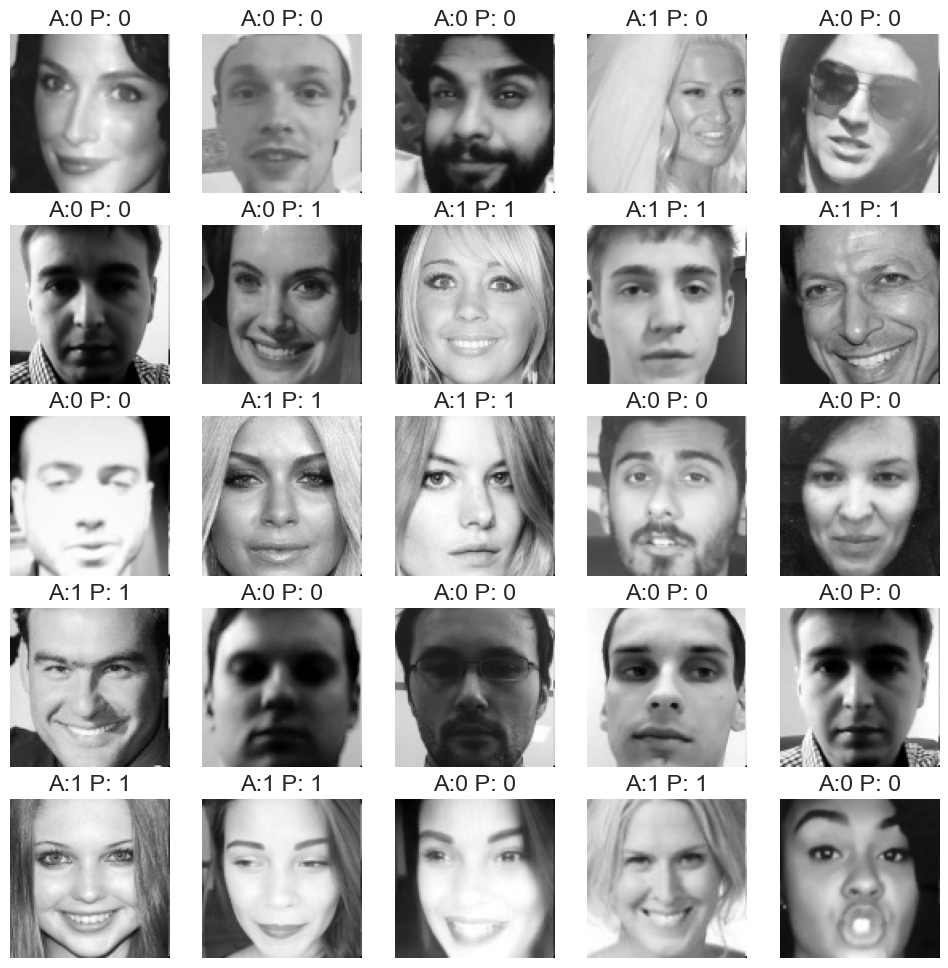

In [97]:
plot_predictions()

In [ ]:
# serialize weights to HDF5
moel.sve(model_name+"5")
print("Model Saved to disk")

In [98]:
model.save("rs3.h5")

/Users/anshdobariya/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import os
import cv2
import numpy as np

# Define the paths to your 'real' and 'spoof' folders
real_folder = 'data/real/real'
spoof_folder = 'data/spoof/spoof/spoof'

# Initialize lists to store images and labels
X = []
y = []

# Function to load images from a folder and assign labels
def load_images_from_folder(folder, label):
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if img_path.endswith(".jpg") or img_path.endswith(".png"):
            img2 = cv2.imread(img_path)  # Read the image using OpenCV
            img = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
            # You may need to resize or preprocess the image here
            X.append(img)
            y.append(label)

# Load images and labels from the 'real' folder
load_images_from_folder(real_folder, 0)

# Load images and labels from the 'spoof' folder
load_images_from_folder(spoof_folder, 1)

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Now, you have your images stored in X and their corresponding labels stored in y
# You can use X and y to train your machine learning model


In [ ]:
loss, acc = model1.evaluate(valid_datagen.flow(X_test, y_test))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=1), np.argmax(model1.predict(X_test), axis=1)))

In [ ]:
ls models/

In [ ]:
tf.keras.utils.plot_model(
    model1,
    to_file='model_with_shapes.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

## Intermediate layer visualization of the CNN

In [ ]:
model1.summary()

In [ ]:
from tensorflow.keras.models import Model
layer_outputs = [layer.output for layer in model1.layers[:20]]
activation_model = Model(inputs=model1.input, outputs=layer_outputs)

In [ ]:
plt.imshow(X_test[28][:,:,0], cmap='gray');
plt.axis('off');

In [ ]:
activations = activation_model.predict(X_test[28].reshape(-1, 100, 100, 1))

In [ ]:
count =0
for layer in activations:
  count+=1
  print('Layer:%2d    Shape: %s ' %(count, str(layer.shape)))

In [ ]:
layer_names = []
for layer in model1.layers[:20]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.axis('off')
    plt.imshow(display_grid, aspect='auto', cmap='gray')
    plt.savefig(layer_name+'.png')

In [ ]:
#   # serialize model to JSON
# model_json = model1.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)

Data Agumentation

In [ ]:
def plot_aug(data,r=5 , c =5):
  w=10
  h=10
  fig=plt.figure(figsize=(12, 12))
  columns = c
  rows = r
  for i in range(1, columns*rows +1):
      fig.add_subplot(rows, columns, i)
      rand_n = np.random.randint(data.shape[0])
      plt.imshow(data[rand_n], cmap='gray')
      # plt.title(f'Actual:{np.argmax(y_test[rand_n])} Predicted: {np.argmax(model.predict(X_test[rand_n].reshape(-1, 100, 100, 1)))}');
      plt.axis('off')
  plt.show()

In [ ]:
# plt.imshow(au_x[0], cmap='gray')
# plt.axis('off')
data = ImageDataGenerator(rescale=1./255.,
                                  #  rotation_range=10,
                                  #  width_shift_range=0.25,
                                  #  height_shift_range=0.25,
                                  #  shear_range=0.1,
                                   zoom_range=0.25,
                                  #  horizontal_flip=False
                          ).flow(X_train, y_train)
au_x, au_y = data.next()[0].reshape(32,100,100), data.next()[1]
au_x.shape, au_y.shape
plot_aug(au_x)